In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("../data/USvideos.csv")

In [3]:
df_n = df.fillna({"description":df["title"]}) # Llenamos valores faltantes.
df = df_n


In [4]:

max_ = df["likes"].quantile() * 0.75
min_ = df["likes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
df.loc[df["likes"] < min_ - 1.5 * (max_ - min_), "likes"] = min_q

max_ = df["category_id"].quantile() * 0.75
min_ = df["category_id"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["category_id"] > max_ + 1.5 * (max_ - min_), "category_id"] = max_q
df.loc[df["category_id"] < min_ - 1.5 * (max_ - min_), "category_id"] = min_q

max_ = df["dislikes"].quantile() * 0.75
min_ = df["dislikes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
df.loc[df["dislikes"] < min_ - 1.5 * (max_ - min_), "dislikes"] = min_q

max_ = df["comment_count"].quantile() * 0.75
min_ = df["comment_count"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["comment_count"] > max_ + 1.5 * (max_ - min_), "comment_count"] = max_q
df.loc[df["comment_count"] < min_ - 1.5 * (max_ - min_), "comment_count"] = min_q

max_ = df["views"].quantile() * 0.75
min_ = df["views"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["views"] > max_ + 1.5 * (max_ - min_), "views"] = max_q
df.loc[df["views"] < min_ - 1.5 * (max_ - min_), "views"] = min_q

max_ = df["lon"].quantile() * 0.75
min_ = df["lon"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lon"] > max_ + 1.5 * (max_ - min_), "lon"] = max_q
df.loc[df["lon"] < min_ - 1.5 * (max_ - min_), "lon"] = min_q

max_ = df["lat"].quantile() * 0.75
min_ = df["lat"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lat"] > max_ + 1.5 * (max_ - min_), "lat"] = max_q
df.loc[df["lat"] < min_ - 1.5 * (max_ - min_), "lat"] = min_q


C:\Users\Crost\AppData\Local\Temp\ipykernel_11344\1827255125.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27136.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
C:\Users\Crost\AppData\Local\Temp\ipykernel_11344\1827255125.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
C:\Users\Crost\AppData\Local\Temp\ipykernel_11344\1827255125.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1022791.5' has dtype incompatible with int64, please explicitly cast to a comp

In [13]:
# Al haber una gran distribución desigual, se aplicará una transformación
df["likes"] = np.log(df["likes"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df["likes"])  # Inversa de logaritmo natural

0        27136.5
1        27136.5
2        27136.5
3        10172.0
4        27136.5
          ...   
40944    27136.5
40945    27136.5
40946    27136.5
40947    27136.5
40948    27136.5
Name: likes, Length: 40949, dtype: float64

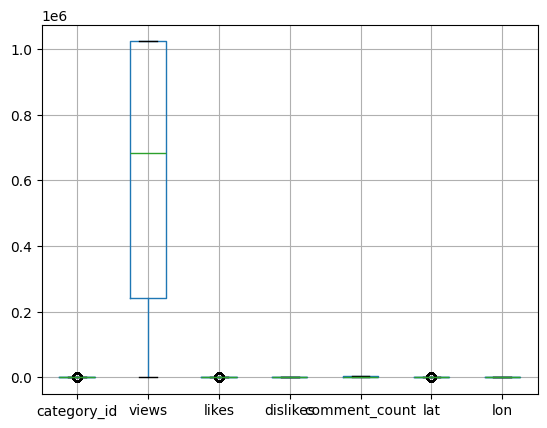

In [14]:
df.boxplot(["category_id","views", "likes", "dislikes", "comment_count", "lat", "lon"])

plt.subplots_adjust(wspace=10)


<Axes: >

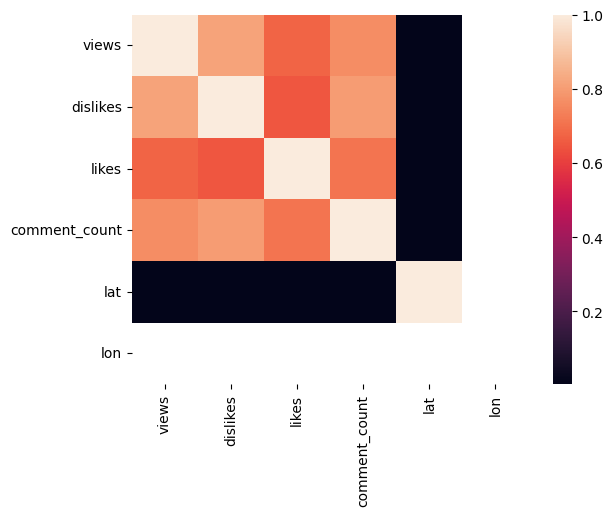

In [15]:
df_a = df[["views", "dislikes", "likes", "comment_count", "lat", "lon"]]
sns.heatmap(df_a.corr())

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
Y_pred = regr.predict(X_test)
pred3 = pd.DataFrame(X_test)
pred3 = pred3.assign(Likes=y_test)
pred3 = pred3.assign(Pred = Y_pred.flatten().tolist())
pred3.head(7)

,views,comment_count,dislikes,Likes,Pred
8013,225941.0,762,728.0,8.255828,8.460869
34432,981263.0,2784,946.5,10.208672,10.033650
27178,413803.0,2784,447.0,9.471550,9.974478
39195,1022791.5,2784,946.5,10.208672,10.175336
1742,216658.0,554,159.0,9.333531,8.826742
20077,972445.0,2067,946.5,10.208672,9.847469
32892,1011279.0,2784,946.5,10.208672,10.027587


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 0.3412413096244741
MSE: 0.27967615771032434
RMSE: 0.5288441714818499
